# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.gridspec as grid_spec

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


##### Load the data

In [4]:
import os

In [53]:
os.chdir(r'C:\Users\racha\MAL1_Assignments\Assignment3_MAL1')

In [55]:
alldata = pd.read_excel('alldata.xlsx')
drdata = pd.read_excel('drdata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2data = pd.read_excel('tv2data.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')
electeddata = pd.read_excel('electeddata.xlsx')

# Age of the candidates grouped by parties.


In [58]:
alldata.head()


,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


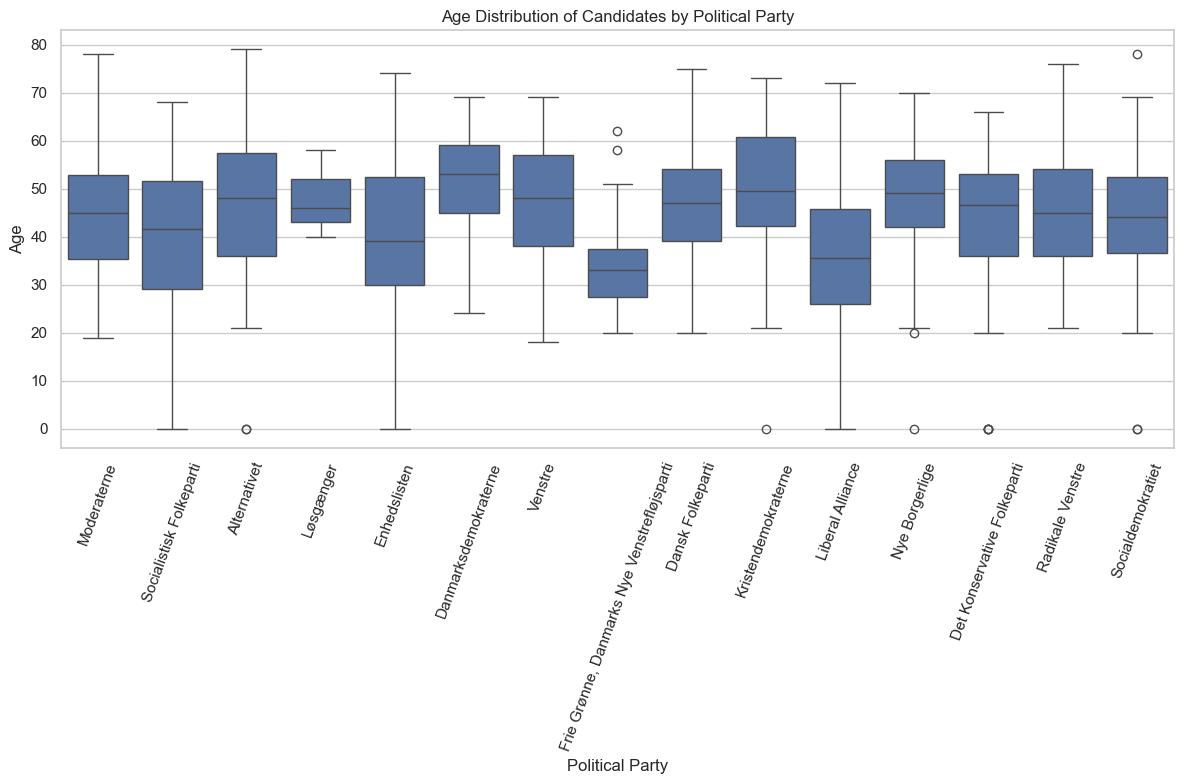

In [60]:
# Plotting the age distribution by party using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='parti', y='alder', data=alldata)
plt.xlabel('Political Party')
plt.ylabel('Age')
plt.title('Age Distribution of Candidates by Political Party')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

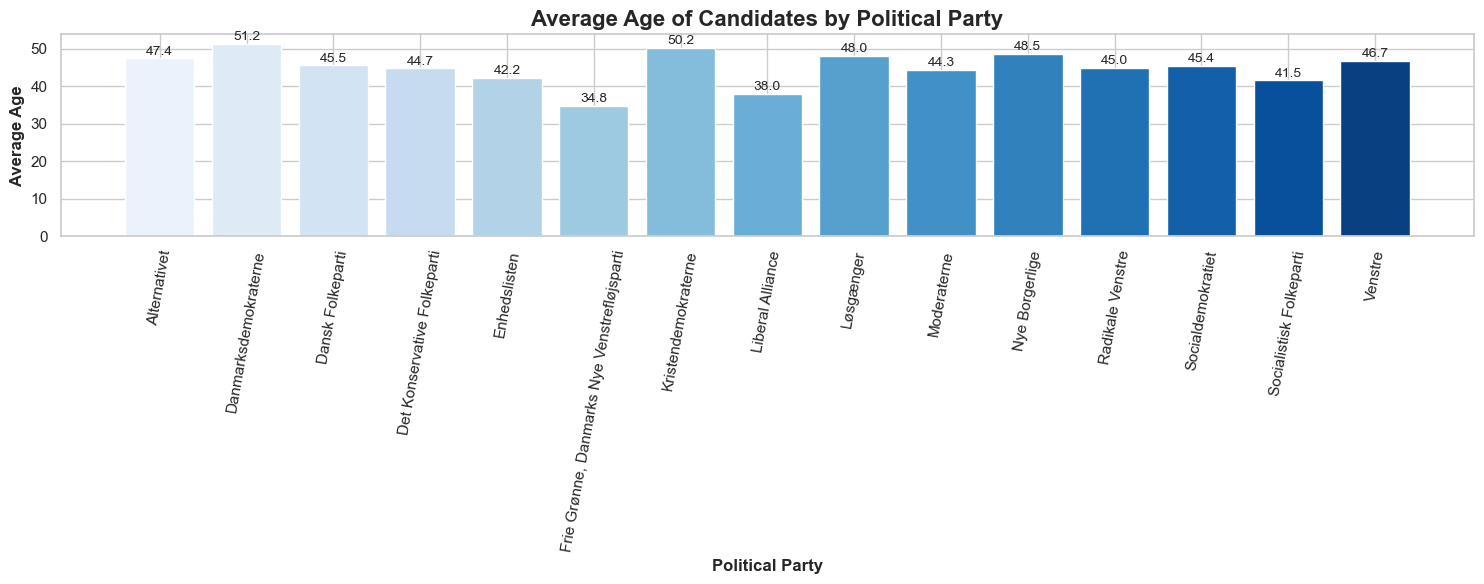

In [62]:
# Remove rows where age is 0
alldata_clean = alldata[alldata['alder'] > 0]

# Apply seaborn theme for a clean look
sns.set_theme(style="whitegrid")

# Group by party and calculate the mean age
average_age = alldata_clean.groupby('parti')['alder'].mean().reset_index()

# Create a color palette for the bars
colors = sns.color_palette("Blues", len(average_age))

# Plot the vertical bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(average_age['parti'], average_age['alder'], color=colors)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', va='bottom', fontsize=10)

# Customize the labels and title
plt.xlabel('Political Party', fontsize=12, fontweight='bold')
plt.ylabel('Average Age', fontsize=12, fontweight='bold')
plt.title('Average Age of Candidates by Political Party', fontsize=16, fontweight='bold')

# Rotate x-tick labels for better readability
plt.xticks(rotation=80)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()

# Parties with lower age averages may attract younger voters, while parties with higher age averages may have a more mature voter base. Understanding the demographics of political parties can be crucial for election campaigns and policy-making.

## An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.


In [65]:
# Filter columns that are likely to be questions based on their names (like '1a', '2a', etc.)
question_columns = alldata.filter(regex='^[0-9]').columns

# Count the total number of questions
total_questions = len(question_columns)

print(f"Total number of questions: {total_questions}")

Total number of questions: 49


In [67]:
# Drop non-question columns
allData_questions = alldata.drop(['storkreds', 'alder'], axis=1)

# Select columns that are likely question responses
columns_to_count = allData_questions.drop(['navn', 'parti'], axis=1).columns

# Count the number of "strongly agree" (2) and "strongly disagree" (-2) responses
allData_questions['strongly_agree_count'] = allData_questions[columns_to_count].isin([2]).sum(axis=1)
allData_questions['strongly_disagree_count'] = allData_questions[columns_to_count].isin([-2]).sum(axis=1)

# Calculate the strong response percentage for each type
allData_questions["strongly_agree_percentage"] = (allData_questions['strongly_agree_count'] / total_questions) * 100
allData_questions["strongly_disagree_percentage"] = (allData_questions['strongly_disagree_count'] / total_questions) * 100

# Display the first few rows to inspect the result
allData_questions[['navn', 'parti', 'strongly_agree_count', 'strongly_disagree_count', 'strongly_agree_percentage', 'strongly_disagree_percentage']].head()

,navn,parti,strongly_agree_count,strongly_disagree_count,strongly_agree_percentage,strongly_disagree_percentage
0,Lars Philipsen Prahm,Moderaterne,15,10,30.612245,20.408163
1,Karsten Hønge,Socialistisk Folkeparti,12,13,24.489796,26.530612
2,Martin Kelleher-Petersen,Alternativet,10,12,20.408163,24.489796
3,Nicklas Gjedsig Larsen,Alternativet,25,8,51.020408,16.326531
4,Tom Gillesberg,Løsgænger,10,21,20.408163,42.857143


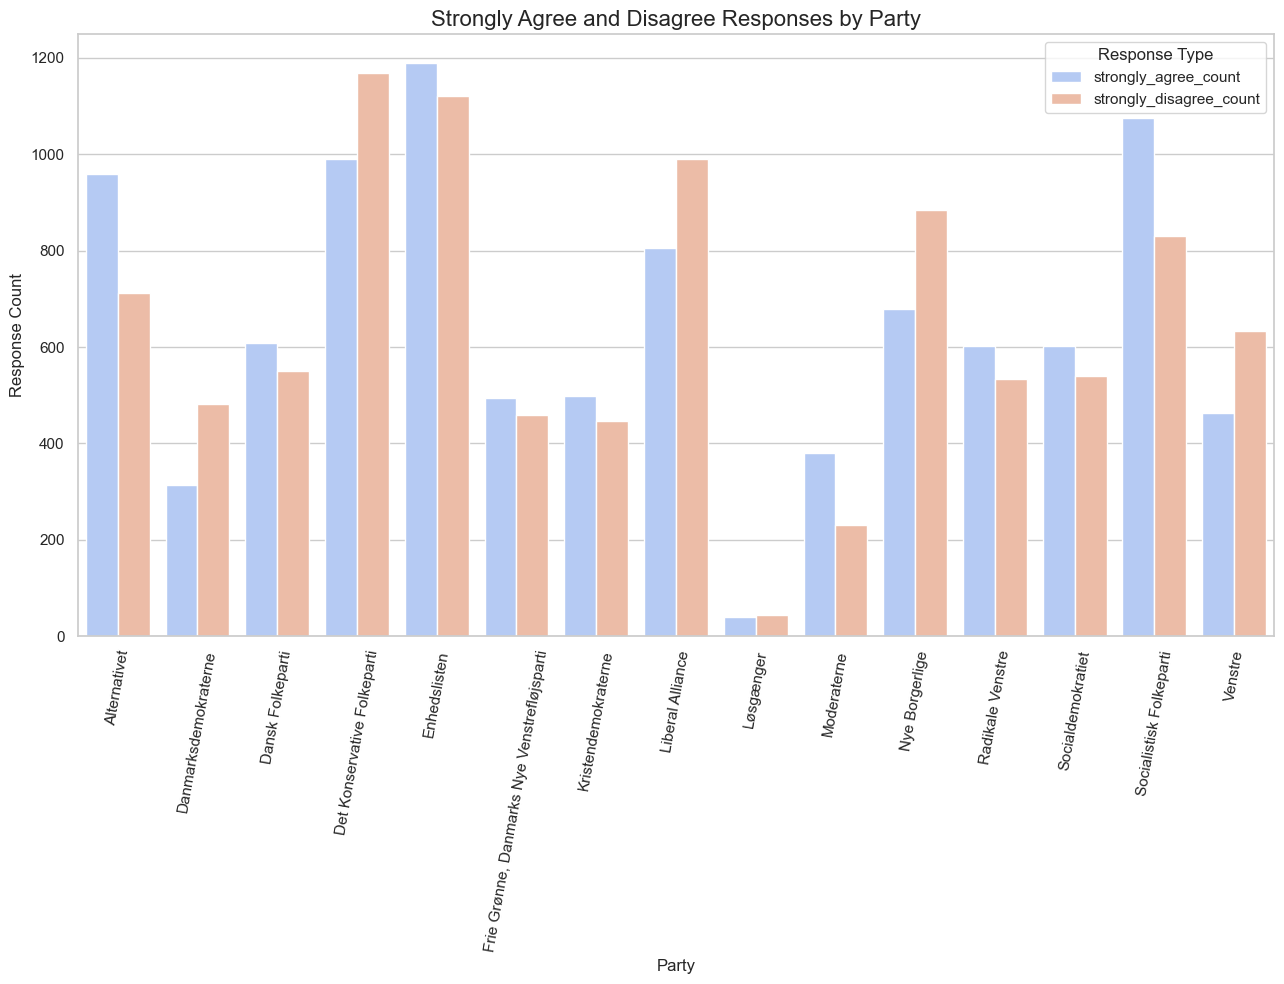

In [69]:
# Set the seaborn theme for clean visuals
sns.set_theme(style="whitegrid")

# Group by 'parti' to sum the strong responses for each party
party_agree_disagree = allData_questions.groupby('parti')[['strongly_agree_count', 'strongly_disagree_count']].sum().reset_index()

# Melt the dataframe to have a "long-form" suitable for seaborn's grouped bar plot
party_melted = party_agree_disagree.melt(id_vars='parti', value_vars=['strongly_agree_count', 'strongly_disagree_count'],
                                         var_name='Response Type', value_name='Count')

# Plotting the grouped bar chart
plt.figure(figsize=(13, 10))
sns.barplot(x='parti', y='Count', hue='Response Type', data=party_melted, palette='coolwarm')
plt.title('Strongly Agree and Disagree Responses by Party', fontsize=16)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Response Count', fontsize=12)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

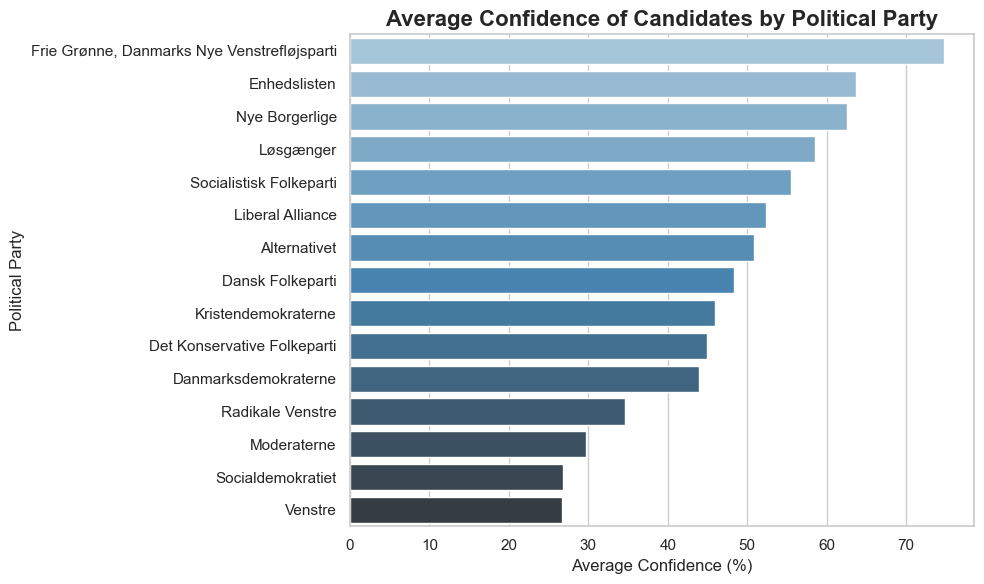

In [71]:
# Count the number of "strongly agree" and "strongly disagree" responses (-2 or 2)
allData_questions['strong_response_count'] = allData_questions[columns_to_count].isin([2, -2]).sum(axis=1)

# Calculate the strong response percentage for each candidate
total_questions = len(columns_to_count)
allData_questions["strong_response_percentage"] = (allData_questions['strong_response_count'] / total_questions) * 100

# Group by party and calculate the average strong response percentage
party_confidence = allData_questions.groupby('parti')['strong_response_percentage'].mean().reset_index()

# Sort the parties by confidence in descending order
party_confidence = party_confidence.sort_values(by='strong_response_percentage', ascending=False)

# Plot the average strong response percentage per party using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='strong_response_percentage', y='parti', data=party_confidence, palette='Blues_d')

# Customize the labels and title
plt.xlabel('Average Confidence (%)')
plt.ylabel('Political Party')
plt.title('Average Confidence of Candidates by Political Party', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

##### The parties with highest average confidence are the same parties with lowest average age. This suggests that younger candidates may be more likely to express strong opinions in the candidate. The relationship between age and confidence could be an interesting area for further investigation.

## Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

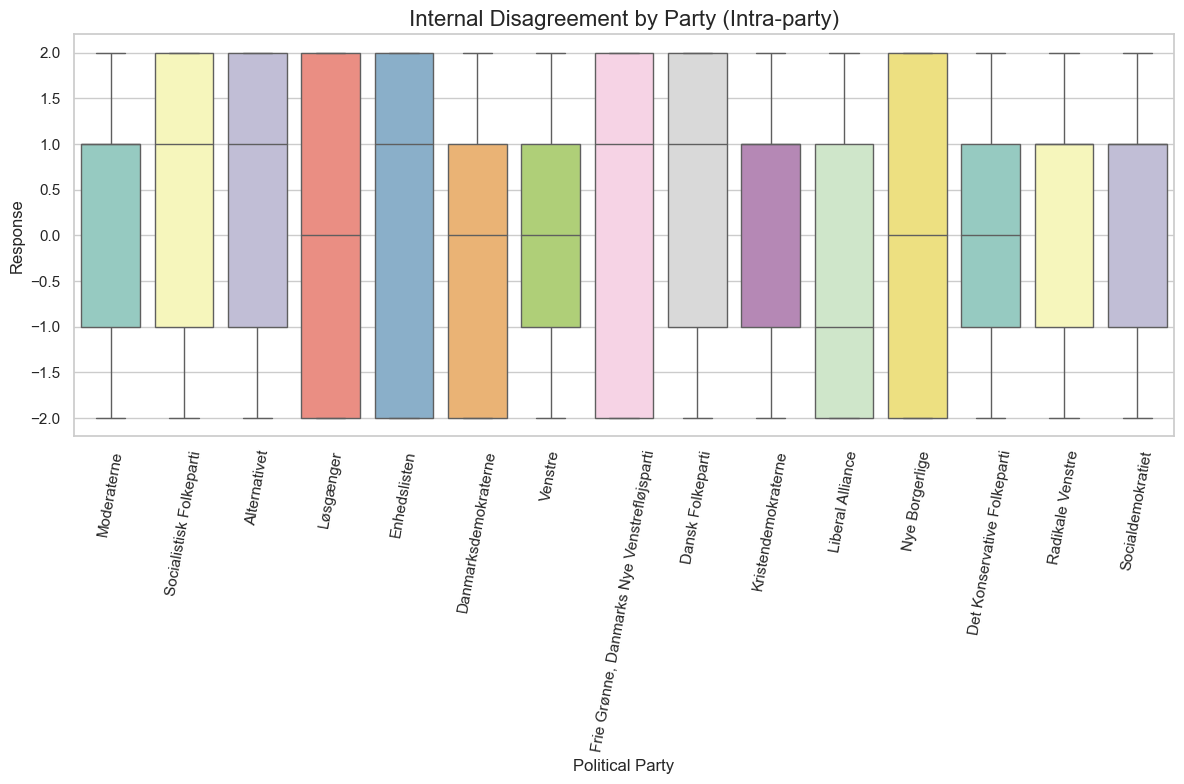

In [75]:
# Melt the data for easier plotting with seaborn
melted_data = alldata.melt(id_vars='parti', value_vars=question_columns, var_name='Question', value_name='Response')

# Plot the box plot for each party
plt.figure(figsize=(12, 8))
sns.boxplot(x='parti', y='Response', data=melted_data, palette='Set3')

# Customize plot
plt.title('Internal Disagreement by Party (Intra-party)', fontsize=16)
plt.xlabel('Political Party', fontsize=12)
plt.ylabel('Response', fontsize=12)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

##### The parties with most disputes are Løsgænger, Nye Borgerlige, Enhedslisten and Frie Grønne, Danmarks Nye Venstrefløjsparti .

In [78]:
 #Filter the data to include only the parties with the most disputes
dispute_parties = ['Løsgænger', 'Nye Borgerlige', 'Enhedslisten', 'Frie Grønne, Danmarks Nye Venstrefløjsparti']
filtered_data = alldata[alldata['parti'].isin(dispute_parties)]

# Filter out the non-question columns (e.g., 'navn', 'parti', etc.)
question_columns = filtered_data.filter(regex='^[0-9]').columns

# Calculate the standard deviation of responses for each question within each filtered party
std_devs_filtered = filtered_data.groupby('parti')[question_columns].std()

# Find the question with the highest disagreement for each party
top_disagreement_questions_filtered = std_devs_filtered.idxmax(axis=1)

# Combine the results into a DataFrame for tabular display
disagreement_summary_filtered = pd.DataFrame({
    'Party': std_devs_filtered.index,
    'Question_with_most_disagreement': top_disagreement_questions_filtered
})

# Display the table
disagreement_summary_filtered.reset_index(drop=True, inplace=True)  # Reset index for cleaner display
disagreement_summary_filtered

,Party,Question_with_most_disagreement
0,Enhedslisten,538
1,"Frie Grønne, Danmarks Nye Venstrefløjsparti",10a
2,Løsgænger,535
3,Nye Borgerlige,2a


In [80]:
# Filter out non-question columns
question_columns = alldata.filter(regex='^[0-9]').columns.tolist()

# Group by party and calculate the mean response for each party for each question
party_means = alldata.groupby('parti')[question_columns].mean()

# Create a DataFrame to store the disagreement information
disagreement_data = []

# Calculate the disagreement (absolute difference in means) between each pair of parties
for party1 in party_means.index:
    for party2 in party_means.index:
        if party1 != party2:
            # Calculate the average absolute difference across all questions
            disagreement = np.abs(party_means.loc[party1] - party_means.loc[party2])
            strong_disagreement_questions = disagreement[disagreement > 1]  # Threshold for strong disagreement
            strong_disagreement_count = len(strong_disagreement_questions)

            # Store the results
            disagreement_data.append([party1, party2, strong_disagreement_count, strong_disagreement_questions.index.tolist()])

# Create a DataFrame from the disagreement data
disagreement_df = pd.DataFrame(disagreement_data, columns=['Party 1', 'Party 2', 'Strong Disagreement Count', 'Questions'])

# Sort by the highest strong disagreement count
disagreement_df_sorted = disagreement_df.sort_values(by='Strong Disagreement Count', ascending=False)

# Display the disagreement table
disagreement_df_sorted

,Party 1,Party 2,Strong Disagreement Count,Questions
152,Nye Borgerlige,Socialistisk Folkeparti,43,"[530, 531, 534, 535, 537, 538, 540, 541, 543, ..."
192,Socialistisk Folkeparti,Nye Borgerlige,43,"[530, 531, 534, 535, 537, 538, 540, 541, 543, ..."
62,Enhedslisten,Liberal Alliance,43,"[530, 531, 533, 534, 535, 537, 538, 540, 541, ..."
102,Liberal Alliance,Enhedslisten,43,"[530, 531, 533, 534, 535, 537, 538, 540, 541, ..."
110,Liberal Alliance,Socialistisk Folkeparti,42,"[530, 531, 537, 538, 540, 541, 543, 544, 545, ..."
...,...,...,...,...
15,Danmarksdemokraterne,Dansk Folkeparti,6,"[534, 545, 546, 1b, 2a, 7a]"
55,Det Konservative Folkeparti,Venstre,5,"[552, 556, 561, 563, 10b]"
199,Venstre,Det Konservative Folkeparti,5,"[552, 556, 561, 563, 10b]"
68,Enhedslisten,Socialistisk Folkeparti,4,"[534, 535, 3a, 8b]"


##### The parties with most internal disagreements are Enhedslisten and Liberal Alliance, nye Borgerlige and Socialistisk Folkeparti, Liberal Alliance and Socialistisk Folkeparti, Enhedslisten and nye Borgerlige. Mostly people with lower age have more internal disagreements comapritvely.

## Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following algorithms: Decision Tree, Random Forest and Gradient Boosted Tree, i.e. a total of 3 models are to be trained.


In [84]:
print("Columns used for features (X):", question_columns + ['alder'])

Columns used for features (X): ['530', '531', '533', '534', '535', '537', '538', '540', '541', '543', '544', '545', '546', '547', '548', '550', '551', '552', '553', '555', '556', '557', '559', '561', '563', '1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'alder']


In [86]:
X = alldata[question_columns + ['alder']] 
y = alldata['parti'] 

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode target labels (parti column)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Store the original indices
original_indices = alldata.index

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X_imputed, 
    y_encoded, 
    original_indices,
    test_size=0.3, 
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

unique_classes = set(y_test)  

party_names = ['Socialdemokratiet', 'Venstre', 'Moderaterne', 'Socialistisk Folkeparti',
               'Danmarksdemokraterne', 'Liberal Alliance', 'Konservative', 'Enhedslisten',
               'Radikale Venstre', 'Nye Borgerlige', 'Alternativet', 'Dansk Folkeparti',
               'Frie Grønne', 'Kristendemokraterne']

In [88]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Gradient Boosted Tree
gbt_model = GradientBoostingClassifier(random_state=42)
gbt_model.fit(X_train_scaled, y_train)
y_pred_gbt = gbt_model.predict(X_test_scaled)
print("Gradient Boosted Tree Accuracy:", accuracy_score(y_test, y_pred_gbt))

Decision Tree Accuracy: 0.7126436781609196
Random Forest Accuracy: 0.9080459770114943
Gradient Boosted Tree Accuracy: 0.8505747126436781


In [89]:
# Evaluate Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

Decision Tree Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.44      0.37      0.40        19
                       Danmarksdemokraterne       0.76      0.87      0.81        15
                           Dansk Folkeparti       0.86      0.71      0.77        17
                Det Konservative Folkeparti       0.65      0.79      0.71        28
                               Enhedslisten       0.86      0.95      0.90        19
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.67      0.57      0.62         7
                        Kristendemokraterne       0.31      0.36      0.33        11
                           Liberal Alliance       0.75      0.68      0.71        22
                                  Løsgænger       0.00      0.00      0.00         0
                                Moderaterne       0.86      0.55      0.67        11
                           

In [90]:
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Confusion Matrix:
[[ 7  0  0  0  0  1  1  0  0  0  0  4  0  4  2]
 [ 0 13  1  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  1 12  0  0  0  1  0  0  0  2  0  0  1  0]
 [ 1  0  1 22  0  0  0  3  0  1  0  0  0  0  0]
 [ 1  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  1  4  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  4  1  1  0  1  2  0  0  0]
 [ 0  0  0  4  0  0  0 15  0  0  2  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  3  0  0  6  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0 18  0  0  0  0]
 [ 2  0  0  0  0  0  3  0  0  0  0 22  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  2 19  0  0]
 [ 2  0  0  0  2  1  0  0  0  0  0  2  0 13  0]
 [ 0  1  0  5  0  0  0  1  0  0  2  0  0  0 13]]


In [91]:
print("Random Forest Classification report:")
print(classification_report(y_test, y_pred_rf, target_names=party_names[:len(unique_classes)]))

Random Forest Classification report:
                         precision    recall  f1-score   support

      Socialdemokratiet       0.82      0.74      0.78        19
                Venstre       1.00      0.93      0.97        15
            Moderaterne       0.89      0.94      0.91        17
Socialistisk Folkeparti       0.92      0.86      0.89        28
   Danmarksdemokraterne       0.86      0.95      0.90        19
       Liberal Alliance       1.00      0.71      0.83         7
           Konservative       1.00      1.00      1.00        11
           Enhedslisten       0.83      0.91      0.87        22
       Radikale Venstre       1.00      0.91      0.95        11
         Nye Borgerlige       0.91      1.00      0.95        20
           Alternativet       0.93      0.96      0.95        27
       Dansk Folkeparti       1.00      1.00      1.00        23
            Frie Grønne       0.90      0.95      0.93        20
    Kristendemokraterne       0.81      0.77      0.

In [96]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[14  0  0  0  2  0  0  0  0  0  2  0  1  0]
 [ 0 14  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  1 24  0  0  0  2  0  0  0  0  0  1]
 [ 1  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 23  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 19  0]
 [ 0  0  0  2  0  0  0  2  0  1  0  0  0 17]]


In [98]:
# Evaluate Gradient Boosted Tree
print("Gradient Boosted Tree Classification Report:")
print(classification_report(y_test, y_pred_gbt, target_names=label_encoder.classes_))

Gradient Boosted Tree Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.72      0.68      0.70        19
                       Danmarksdemokraterne       0.93      0.93      0.93        15
                           Dansk Folkeparti       0.78      0.82      0.80        17
                Det Konservative Folkeparti       0.79      0.82      0.81        28
                               Enhedslisten       0.82      0.95      0.88        19
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.57      0.73         7
                        Kristendemokraterne       0.75      0.82      0.78        11
                           Liberal Alliance       0.79      0.86      0.83        22
                                  Løsgænger       0.00      0.00      0.00         0
                                Moderaterne       1.00      0.91      0.95        11
                   

In [100]:
print("Gradient Boosted Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbt))

Gradient Boosted Tree Confusion Matrix:
[[13  0  0  0  2  0  1  0  1  0  0  1  0  1  0]
 [ 0 14  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 14  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  1 23  0  0  0  3  0  0  0  0  0  0  1]
 [ 1  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  1  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  9  0  0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0 19  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  1]
 [ 0  0  1  0  0  0  0  0  0  0 18  0  0  0  1]
 [ 1  0  0  1  0  0  2  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0]
 [ 2  0  0  0  1  0  0  0  0  0  0  0  0 17  0]
 [ 0  0  0  2  0  0  0  2  1  0  0  0  0  0 17]]


#### Prediction using random forest



In [103]:
pred_and_true = pd.DataFrame()
pred_and_true["name"] = alldata.loc[test_indices, "navn"]
pred_and_true["original_party"] = alldata.loc[test_indices, "parti"]  

# Inverse transform the predictions to get the original party names
pred_and_true["pred_party"] = label_encoder.inverse_transform(y_pred_rf )  # Use inverse_transform here

# Display discrepancies
wrong_party_candidates = pred_and_true[pred_and_true["original_party"] != pred_and_true["pred_party"]]

wrong_party_candidates

,name,original_party,pred_party
481,Michael Flarup,Radikale Venstre,Socialistisk Folkeparti
525,Marianne Karlberg,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet
433,Rishi Balachandran,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Enhedslisten
275,Dorte M. Nielsen,Socialistisk Folkeparti,Alternativet
352,Araz Khan,Venstre,Liberal Alliance
473,Ole Gade,Det Konservative Folkeparti,Liberal Alliance
120,Mette Kaasfeldt Bram,Alternativet,Radikale Venstre
63,Kurt Vind Christiansen,Liberal Alliance,Venstre
500,Johanna-Maria Precht,Enhedslisten,Alternativet
260,Christian Langballe,Dansk Folkeparti,Nye Borgerlige
